<center><h1>Universidad Politécnica Salesiana</h1></center>
<center><h5>Prueba 1 segundo interciclo</h5></center>
<center><h4>Nombre: Angel Jadan</h4></center>
<center><h5>04/07/2021</h5></center>
    

# Escuela básica o bachillerato LA 'ASUNCIÓN'
### Número de estudiantes: 2695
### Hombres: 1004
### Mujeres: 1691

### Profesores/adminstrativos: 145

In [252]:
import random
import simpy
import random
import collections
import matplotlib.pyplot as pp

In [260]:
print("Escuela básica o bachillerato LA 'ASUNCIÓN' ")
print("     Número de estudiantes")
print("*****Hombres: 1004")
print("*****Mujeres: 1691")
print("     Total: 2695")

PROFESORES = 145
P_PROF_VACUNADOS = int(PROFESORES*0.9)
VACUNADOS_PROF = PROFESORES - P_PROF_VACUNADOS
print("Profesores: ",PROFESORES)
print("Profesores vacunados: ",P_PROF_VACUNADOS)
print("Profesores no vacunados:",VACUNADOS_PROF)
ESTUDIANTES = 2695
print("Estudiantes: ",ESTUDIANTES)
P_ESTUDIANTES_NO = random.randint(5,10)
print("% de estudiantes que no asisten: ",P_ESTUDIANTES_NO,"%")
ESTUDIANTES_NO_ASISTEN = int(ESTUDIANTES * P_ESTUDIANTES_NO /100)
print("N° Estudiantes que no asisten: ",ESTUDIANTES_NO_ASISTEN)
ESTUDIANTES_ASISTEN = ESTUDIANTES-ESTUDIANTES_NO_ASISTEN
print("Estudiantes que asisten: ",ESTUDIANTES_ASISTEN)

#Total de estudiantes y profesores vacunados que asisten
TOTAL = P_PROF_VACUNADOS + ESTUDIANTES_ASISTEN

TOTAL_CONTAGIADOS = 0

print("total: ",TOTAL)

cursos = ['curso 1','curso 2','curso 3','curso 4','curso 5','curso 6']
aula1 = {}
aula2 = {}
aula3 = {}
aula4 = {}
aula5 = {}
aula6 = {}

print("Cursos: ",cursos)

#Para el numero de contagiados al final del 
contagiados = []

Escuela básica o bachillerato LA 'ASUNCIÓN' 
     Número de estudiantes
*****Hombres: 1004
*****Mujeres: 1691
     Total: 2695
Profesores:  145
Profesores vacunados:  130
Profesores no vacunados: 15
Estudiantes:  2695
% de estudiantes que no asisten:  6 %
N° Estudiantes que no asisten:  161
Estudiantes que asisten:  2534
total:  2664
Cursos:  ['curso 1', 'curso 2', 'curso 3', 'curso 4', 'curso 5', 'curso 6']


Métodos para usar el aula y selección de aula a la que petenencen.

In [261]:
def uso_aula(env,estudiante,aula,curso):
    #print("est: ",estudiantes)
    #curso.puesto_usado+=1
    print(aula)
    print("Hora",env.now)
    
    
    if aula=="Curso 1":
        aula1[estudiante]=estudiante
        yield env.timeout(0.01)
        return
    if aula=="Curso 2":
        aula2[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    if aula=="Curso 3":
        aula3[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    if aula=="Curso 4":
        aula4[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    if aula=="Curso 5":
        aula5[estudiante]=estudiante
        yield env.timeout(0.01)
        return
    if aula=="Curso 6":
        aula6[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    yield env.timeout(0.05)
    return
        
def clases(env, curso):
    print("Clases")
    c = 0
    while True:
        yield env.timeout(random.expovariate(1/0.005))
        print("time ",env.now)
        aula = random.choice(curso.cursos)
        print("El estudiante pertenece al curso. ",aula)
        print("Hora: ",env.now)
        estudiante = curso.estudiantes[c]
        print("estudiante. ",estudiante)
        tot = len(aula1)+len(aula2)+len(aula3)+len(aula4)+len(aula5)+len(aula6)
        if tot < curso.n_estudiantes:
            yield env.process(uso_aula(env, estudiante,aula,curso))
        else:
            print("Ya no hay mas estudiantes")
            print("Tiempo ",env.now)
            break
        c+=1

In [272]:
Curso = collections.namedtuple('Curso','contador,cursos,capacidad,usado,t_curso_lleno,puesto_usado,estudiantes,n_estudiantes')
print("Institucion educativa")

env = simpy.Environment()

contador = simpy.Resource(env, capacity=6)
cursos = ["Curso 1","Curso 2","Curso 3","Curso 4","Curso 5","Curso 6"]
capacidad = {curso: int(((ESTUDIANTES_ASISTEN)/len(cursos))+3) for curso in cursos}
usado = {curso:env.event() for curso in cursos}
#Tiempo en el que el curso se llena
t_curso_lleno = {curso: None for curso in cursos}

#Numero de puestos usados
puesto_usado = {curso: 0 for curso in cursos}

estudiantes =[0] * ESTUDIANTES_ASISTEN
for j in range(ESTUDIANTES_ASISTEN):
    estudiantes[j] = "Estudiante "+str(j)

n_estudiantes = ESTUDIANTES_ASISTEN
    
print("cursos: ",cursos[1])

curs = Curso(contador, cursos, capacidad, usado,t_curso_lleno,puesto_usado,estudiantes,n_estudiantes)
env.process(clases(env,curs))
env.run(until=35)

Institucion educativa
cursos:  Curso 2
Clases
time  0.012249600018954799
El estudiante pertenece al curso.  Curso 4
Hora:  0.012249600018954799
estudiante.  Estudiante 0
Curso 4
Hora 0.012249600018954799
time  0.023608325384386206
El estudiante pertenece al curso.  Curso 6
Hora:  0.023608325384386206
estudiante.  Estudiante 1
Curso 6
Hora 0.023608325384386206
time  0.04098549230214095
El estudiante pertenece al curso.  Curso 4
Hora:  0.04098549230214095
estudiante.  Estudiante 2
Curso 4
Hora 0.04098549230214095
time  0.05450201944320052
El estudiante pertenece al curso.  Curso 5
Hora:  0.05450201944320052
estudiante.  Estudiante 3
Curso 5
Hora 0.05450201944320052
time  0.06490341647970692
El estudiante pertenece al curso.  Curso 3
Hora:  0.06490341647970692
estudiante.  Estudiante 4
Curso 3
Hora 0.06490341647970692
time  0.07641390913127827
El estudiante pertenece al curso.  Curso 3
Hora:  0.07641390913127827
estudiante.  Estudiante 5
Curso 3
Hora 0.07641390913127827
time  0.0978167401

Hora:  2.3255424398297215
estudiante.  Estudiante 158
Curso 1
Hora 2.3255424398297215
time  2.3381664513075013
El estudiante pertenece al curso.  Curso 1
Hora:  2.3381664513075013
estudiante.  Estudiante 159
Curso 1
Hora 2.3381664513075013
time  2.352216633328862
El estudiante pertenece al curso.  Curso 3
Hora:  2.352216633328862
estudiante.  Estudiante 160
Curso 3
Hora 2.352216633328862
time  2.36708424476968
El estudiante pertenece al curso.  Curso 4
Hora:  2.36708424476968
estudiante.  Estudiante 161
Curso 4
Hora 2.36708424476968
time  2.378905126245445
El estudiante pertenece al curso.  Curso 6
Hora:  2.378905126245445
estudiante.  Estudiante 162
Curso 6
Hora 2.378905126245445
time  2.3932583984788316
El estudiante pertenece al curso.  Curso 4
Hora:  2.3932583984788316
estudiante.  Estudiante 163
Curso 4
Hora 2.3932583984788316
time  2.404042875468904
El estudiante pertenece al curso.  Curso 4
Hora:  2.404042875468904
estudiante.  Estudiante 164
Curso 4
Hora 2.404042875468904
time 

Método para calcular el 

In [273]:
tot = len(aula1)+len(aula2)+len(aula3)+len(aula4)+len(aula5)+len(aula6)

aulas_x = ["aula 1","aula 2","aula 3","aula 4","aula 5","aula 6"]
aulas_y = [len(aula1), len(aula2), len(aula3), len(aula4), len(aula5), len(aula6)]
print("Total estudiantes que deben asistir en el periodo de prueba. ",n_estudiantes)

print("Estudiantes por aula")
print("Aula 1 ",len(aula1))
print("Aula 2 ",len(aula2))
print("Aula 3 ",len(aula3))
print("Aula 4 ",len(aula4))
print("Aula 5 ",len(aula5))
print("Aula 6 ",len(aula6))
print("_______________________________")
print("Total de \nestudiantes que asistierón ",tot)

Total estudiantes que deben asistir en el periodo de prueba.  2534
Estudiantes por aula
Aula 1  454
Aula 2  429
Aula 3  383
Aula 4  420
Aula 5  410
Aula 6  438
_______________________________
Total de 
estudiantes que asistierón  2534


In [274]:
por_pcr = int(tot*0.10)
print("Numero de estudiantes ha hacer la prueba: ",por_pcr," de ",tot)
por_pcr = int(len(aula6)*0.02)
print("Aula 6 se cierra")
print("Numero de estudiantes que dan positivo de la ultima aula: ",por_pcr," de ",len(aula6))
TOTAL_CONTAGIADOS=TOTAL_CONTAGIADOS+por_pcr
print("TOTAL CONTAGIADOS: ",TOTAL_CONTAGIADOS)

Numero de estudiantes ha hacer la prueba:  253  de  2534
Aula 6 se cierra
Numero de estudiantes que dan positivo de la ultima aula:  8  de  438
TOTAL CONTAGIADOS:  16


['aula 1', 'aula 2', 'aula 3', 'aula 4', 'aula 5', 'aula 6']
[454, 429, 383, 420, 410, 438]


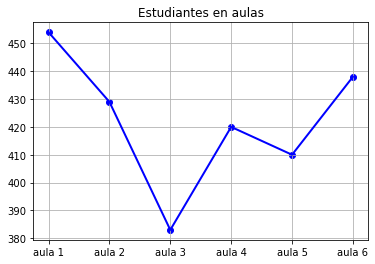

In [275]:
x = aulas_x
y = aulas_y

print(x)
print(y)

pp.plot(x,y, linewidth=2,color='blue')
pp.scatter(x,y,color='blue')
pp.title("Estudiantes en aulas")
pp.grid(True)
pp.show()

In [276]:
contg

def inicio_clases(env, resource, espera, prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        yield req
        print("Inicio clases: ",env.now)
        yield env.timeout(3.5)
        return
    print("Fin primera jornada: ",env.now)
    return 
    
def receso(env,n_est,resource,espera,prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        print("Inicio de receso: ",env.now)
        yield req
        print("est",n_est)
        contg = int(n_est * 0.02)
        contg = contg
        print("Numero de contagiados 2% en receso. ",contg)
        yield env.timeout(0.5)#0.5 representa media hora (30 min)   
        return
    print("Fin receso: ",env.now)
    return
    
def fin_clases(env, resource, espera, prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        yield req
        print("Inicio segunda jornada: ",env.now)
        yield env.timeout(2)
        return
    print("Fin segunda jornada: ",env.now)
    return

In [277]:
env = simpy.Environment()
res = simpy.PriorityResource(env, capacity=1)

t_est = len(aula1)+len(aula2)+len(aula3)+len(aula4)+len(aula5)
print(n_est)
jornada1 = env.process(inicio_clases(env,res, espera=0,prio=0))
receso = env.process(receso(env,t_est,res, espera=3.5,prio=1))
jornada2 = env.process(fin_clases(env,res, espera=2,prio=2))

env.run()

2335
Inicio clases:  0
Inicio de receso:  3.5
est 2096
Numero de contagiados 2% en receso.  41
Inicio segunda jornada:  4.0


In [278]:
contg = int(n_est*0.02)
t=contg+TOTAL_CONTAGIADOS
print("Número de estudiantes de última aula cerrada: ",len(aula6))
print("Numero de contagiados con prueba pcr: ",TOTAL_CONTAGIADOS)
print("Numero de contagiados en el receso de 4 aulas: ",contg)
print("Numero de contagiados en total: ",t)

Número de estudiantes de última aula cerrada:  438
Numero de contagiados con prueba pcr:  16
Numero de contagiados en el receso de 4 aulas:  46
Numero de contagiados en total:  62
